[[71  1]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.996031746031746


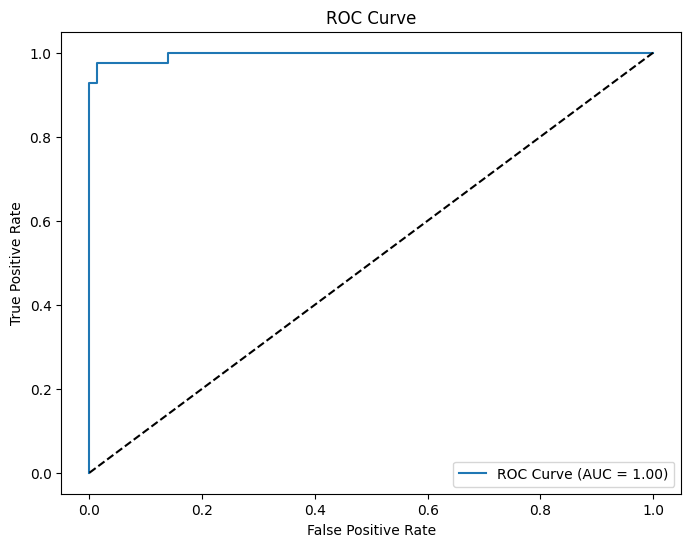

[[71  1]
 [ 1 41]]
0.9761904761904762
0.9761904761904762


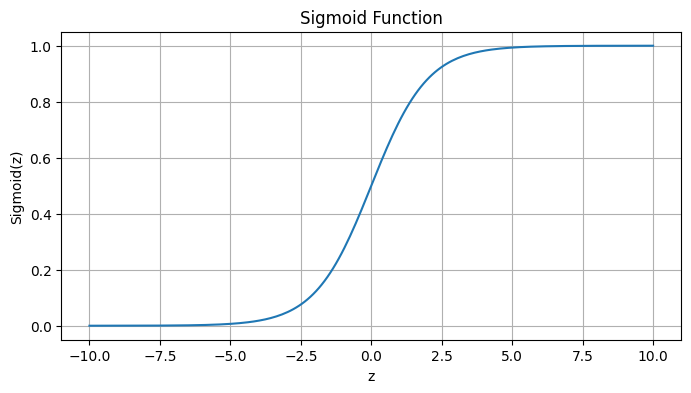

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

df = pd.read_csv('/content/data.csv')
df = df.dropna(axis=1, how='all')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
if 'id' in df.columns:
    df = df.drop(columns=['id'])
df = df.fillna(df.mean(numeric_only=True))
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
threshold = 0.3
y_pred_new = (y_pred_prob >= threshold).astype(int)
print(confusion_matrix(y_test, y_pred_new))
print(precision_score(y_test, y_pred_new))
print(recall_score(y_test, y_pred_new))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-10, 10, 200)
plt.figure(figsize=(8,4))
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(True)
plt.show()
